In [ ]:
using DifferentialEquations
using Plots

function main()
    prob = DDEProblem(ev_model!, u0, h_func, tspan, p)
    sol = solve(prob)
    p1 = plot(sol, idxs = 1, label="Eletrical Vehicles", xlabel="Time", ylabel="Quantity", dpi=100, linewidth=3)
    p2 = plot(sol, idxs = 2, label="Charging Stations", xlabel="Time", ylabel="Quantity", dpi=100, linewidth=3)
    p3 = plot(sol, idxs = 3, label="Spending", xlabel="Time", ylabel="Quantity", dpi=100, linewidth=3)
    p4 = plot(sol, idxs = (1, 2), hline = label="A line", xlabel="CHG", ylabel="EV", dpi=100, linewidth=3)

    plot(p1, p2, p3, p4, layout = (2, 2))
end

function h_func(p, t)
    return [12_800.0, 436.0, 0.0]  # same as initial, fine for t < 0
end

function ev_model!(du, u, h, p, t) # add spending carrying capactiy | fix spending logic | SOLVE PEV
    EV, CHG, Spending = u
    EV_delayed = h(p, t - 5.0)[1]


    N, M, S, RB0, GF0, rEV, rCHG = p

    if Spending < S # Chance these numbers to be more *static*, not dependent on number of EVs and CHGs
        RB = RB0 / (1 + EV/N)
        GF = GF0 / (1 + CHG/M)
    else
        RB = 0.0
        GF = 0.0
    end

    newEV = maximum([(rEV * (1 - EV/N)) + (RB/107 * (1 - EV/N)) * (CHG*10/EV), 0.0])
    du[1] = newEV # (Number of EVs that would've been bought naturally + Number of EVs that will be bought with rebate) * (Influence by CHGs) (**)
    newCHG = maximum([(rCHG * (1 - CHG/M)) + (GF/1 * (1 - CHG/M)) * (EV_delayed/CHG*10), 0.0])
    du[2] = newCHG # ((Number of CHGs that would've been bought naturally + Number of CHGs that will be bought with grants) * (Influence by EVs)) (**)
    du[3] = (newEV * RB + newCHG * GF) # New EVs * RB + New CHGs * GF (***)

end


u0 = [12_800.0, 436.0, 0.0] # EV, CHG, Spending (Initial)
p = 1_063_446.0, 106_345.0, 5_000_000.0, 100.0, 100.0, 0.005, 0.005 # EV, CHG, Spending (Capactiy), RB, GF (Initial), rEV, rCHG (base ratio), 1:10 ratio
tspan = (0.0, 120.0)

main()

ev_model! (generic function with 1 method)

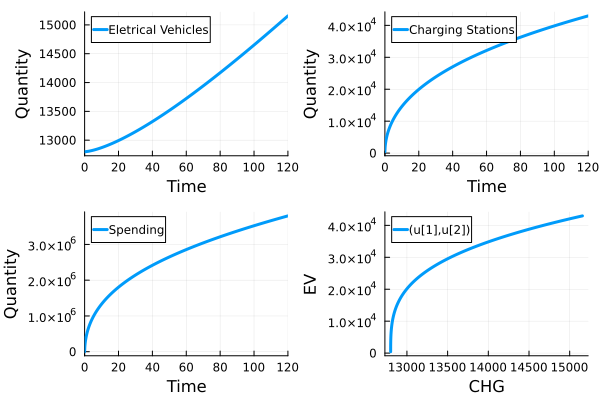

In [65]:
u0 = [12_800.0, 436.0, 0.0] # EV, CHG, Spending (Initial)
p = 1_063_446.0, 106_345.0, 5_000_000.0, 100.0, 100.0, 0.005, 0.005 # EV, CHG, Spending (Capactiy), RB, GF (Initial), rEV, rCHG (base ratio), 1:10 ratio
tspan = (0.0, 120.0)

main()